In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import scipy.optimize as optimize
from scipy.optimize import brenth

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
pi=4*np.arctan(1.)

In [2]:
def U(x):
    return x**2+0.02*(np.cos(167*x)+np.sin(73*x))

def dU(x):
    return 2*x+0.02*(-167*np.sin(167*x)+73*np.cos(73*x))

def T(x):
    return 1.-(dU(x)/g1)**2

def dT(x):
    return -2*dU(x)*ddU(x)/g1**2

def ddU(x):
    return 2.+0.02*(-167**2*np.cos(167*x)-73**2*np.sin(73*x))

def Ueff(x):
    return U(x)+T(x)/g2

def dUeff(x):
    return dU(x)*(1.-2*ddU(x)/(g2*g1**2))

def ddUeff(x):
    return ddU(x)*(1.-2*ddU(x)/(g2*g1**2))

In [3]:
def LL(x):
    return 2*x + 0.02*(167+73)
    
def UL(x):
    return 2*x - 0.02*(167+73)

def f1(x):
    return dU(x)-g1
def f2(x):
    return dU(x)+g1

def integrand(x):
    return dUeff(x)/T(x)

In [4]:
def root(F, x1, x2, div, it):
    X=np.linspace(x1,x2, div)
    roots=np.array([])
    for i in range(div-1):
        if F(X[i])*F(X[i+1])<=0:
            p1=X[i]
            p2=X[i+1]
            r=brenth(F, p1, p2, maxiter=it)
            roots=np.append(roots, r)
    return roots

In [5]:
def integral2(F, X):
    l=len(X)
    Func=np.zeros(l)
    id0=int(0.5*l)
    xmin=X[id0]
    Func[id0]=0
    for i in range(1,l):
        if i<=id0:
            x0 = X[id0-i+1]
            x1 = X[id0-i]
            Func[id0-i]=integrate.quad(F, x0, x1)[0]
            Func[id0-i]=Func[id0-i]+Func[id0-i+1]
        else:
            x0 = X[i-1]
            x1 = X[i]
            Func[i]=integrate.quad(F, x0, x1)[0]
            Func[i]=Func[i]+Func[i-1]
    return Func

In [6]:
def evol(x, h):
    e=np.random.normal(0, 1)
    y=x-h*dU(x)/g1+np.sqrt(2*T(x)*h/(g1*g2))*e
    return y

## G1 critical

In [7]:
g1 = 0.5 #finding critic value for g1
dg1 = 1.

for i in range(50):    
    a1 = root(f1, 0.5*LL( 0.5*g1), 0.5*UL( 0.5*g1), 5000, 100)
    a2 = root(f2, 0.5*LL(-0.5*g1), 0.5*UL(-0.5*g1), 5000, 100)
    positive = np.concatenate([a1[a1>0], a2[a2>0]])
    negative = np.concatenate([a1[a1<0], a2[a2<0]])
    xmin = max(0.99*negative)
    xmax = min(0.99*positive)
    x=np.linspace(xmin, xmax, 1000)
    v1 = max(dU(x))
    v2 = min(dU(x))
    
    if v1 <= g1 and v2 >=-g1:
        g1 = g1 - dg1
    if v1 > g1 or v2 < -g1:
        g1 = g1 + dg1
        dg1 = dg1/2.
print (g1, dg1)
g1c = g1

1.49072265625 0.000244140625


## G1 minimum

In [8]:
g1 = g1c  #finding minimum value of interest for g1
dg1 = 2
for i in range(50):    
    a1 = root(f1, 0.5*LL( 0.5*g1), 0.5*UL( 0.5*g1), 5000, 100)
    a2 = root(f2, 0.5*LL(-0.5*g1), 0.5*UL(-0.5*g1), 5000, 100)
    
    if min(a1)>0 and max(a2)<0:
        g1 = g1 - dg1
    if min(a1)<0 or  max(a2)>0:
        g1 = g1 + dg1
        dg1 = dg1/2.
print (g1, dg1)
g1min = g1

4.649166107177734 4.76837158203125e-07


## Several temperatures

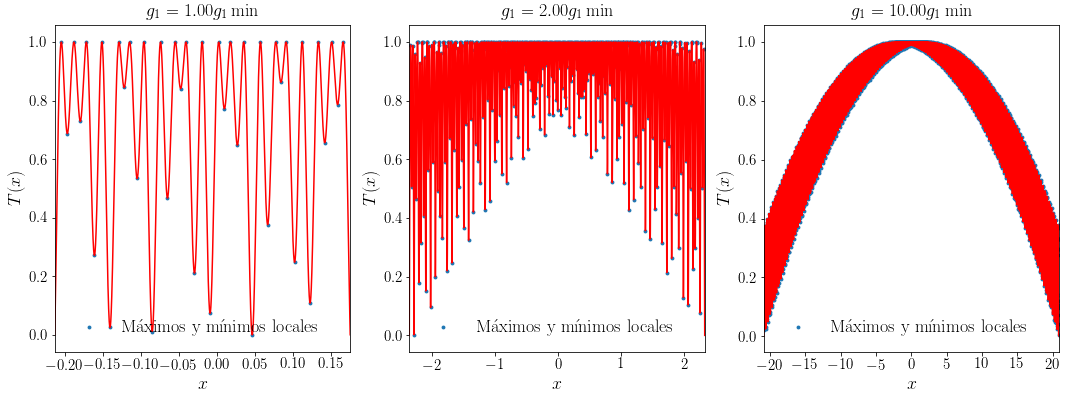

In [9]:
G1=np.array([1.00, 2., 10.])
plt.figure(figsize=(18, 6))
for i in range(3):
    g1=G1[i]*g1min

    a2 = root(f1, 0.5*LL(0.5*g1), 0.5*UL(0.5*g1), 5000, 1000)
    a1 = root(f2, 0.5*LL(-0.5*g1), 0.5*UL(-0.5*g1), 5000, 1000)
    positive = np.concatenate([a2[a2>0], a1[a1>0]])
    negative = np.concatenate([a2[a2<0], a1[a1<0]])
    xmin = max(negative)
    xmax = min(positive)
    x = np.linspace(xmin,xmax, 10000)

    rT = root(dT, xmin, xmax, 30000, 300)
    x=np.concatenate([x,rT])
    x=np.sort(x)

    plt.subplot(1,3,i+1)
    plt.plot(x, T(x), color='red')
    plt.scatter(rT, T(rT), lw= 0, s= 15, label=r'M\'aximos y m\'inimos locales')
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlim([xmin,xmax])
    plt.title(r'$g_1 = %.2f g_1\min $'%G1[i], fontsize=18)
    plt.xlabel('$x$', fontsize=18)
    plt.ylabel('$T(x)$', fontsize=18)
    plt.legend(loc='best', frameon=0, fontsize=18)

plt.savefig('Tzwanzig.png', bbox_inches='tight')
plt.show()
plt.close()

## Potencial efectivo

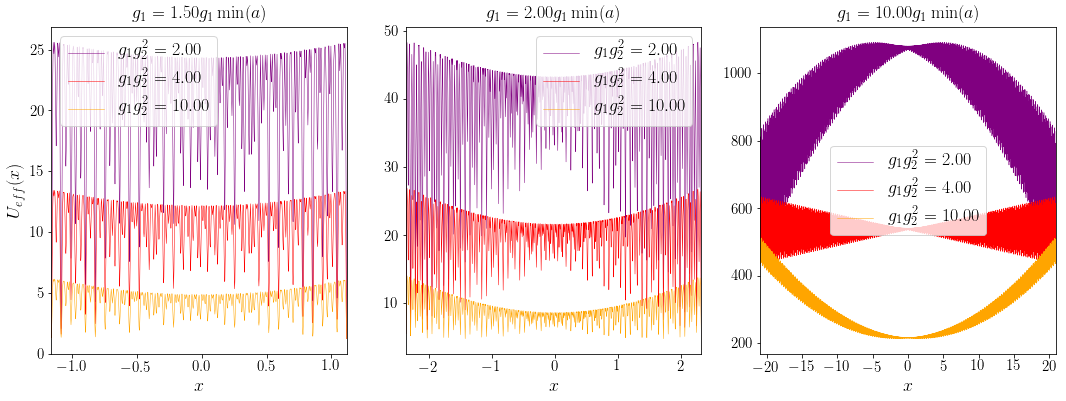

In [10]:
G1 = np.array([1.5, 2.0, 10.])
goal = np.array([2., 4., 10.])
color=['purple', 'red', 'orange']

plt.figure(figsize=(18, 6))
for j in range(3):
    times=G1[j]
    g1=times*g1min
    a2 = root(f1, 0.5*LL(0.5*g1), 0.5*UL(0.5*g1), 5000, 1000)
    a1 = root(f2, 0.5*LL(-0.5*g1), 0.5*UL(-0.5*g1), 5000, 1000)
    positive = np.concatenate([a2[a2>0], a1[a1>0]])
    negative = np.concatenate([a2[a2<0], a1[a1<0]])
    xmin = max(negative)
    xmax = min(positive)
    rU = root(dU, xmin,xmax, 5000, 500)
    rT = root(dT, xmin,xmax, 5000, 500)
    x = np.linspace(xmin,xmax, 500)
    x = np.concatenate([x,rU,rT])
    x = np.sort(x)
    plt.subplot(1, 3, j+1)
    for k in range(3):
        g2 = goal[k]/g1**2
        plt.plot(x, Ueff(x), color=color[k],label=r'$g_1 g_2^2=%.2f$'%goal[k], alpha= 1, lw =0.5)
    plt.xlim([xmin,xmax])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('$x$', fontsize=18)
    plt.title(r'$g_1 =%.2f g_1\min(a)$'%( times), fontsize=18)
    if j==0: plt.ylabel(r'$U_{eff}(x)$', fontsize=18)
    plt.legend(frameon=1, loc='best', fontsize=18)
plt.savefig('UZ2.png', bbox_inches='tight')
plt.show()
plt.close()

## Probability

C:\Users\hp\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)


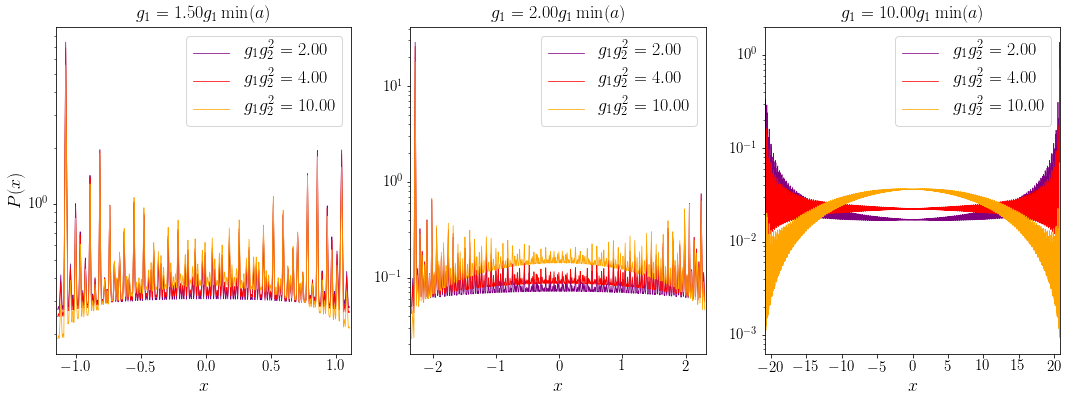

In [12]:
G1 = np.array([1.5, 2.0, 10.])
goal = np.array([2., 4., 10.])
color=['purple', 'red', 'orange']

plt.figure(figsize=(18, 6))
for j in range(3):
    times=G1[j]
    g1=times*g1min
    a2 = root(f1, 0.5*LL(0.5*g1), 0.5*UL(0.5*g1), 5000, 1000)
    a1 = root(f2, 0.5*LL(-0.5*g1), 0.5*UL(-0.5*g1), 5000, 1000)
    positive = np.concatenate([a2[a2>0], a1[a1>0]])
    negative = np.concatenate([a2[a2<0], a1[a1<0]])
    xmin = max(negative)
    xmax = min(positive)
    rU = root(dU, xmin,xmax, 5000, 500)
    rT = root(dT, xmin,xmax, 5000, 500)
    x = np.linspace(0.9*xmin,0.9*xmax, 500)
    x = np.concatenate([x,rU,rT])
    x = np.sort(x)
    plt.subplot(1, 3, j+1)
    for k in range(3):
        g2 = goal[k]/g1**2
        inte=integral2(integrand, x)
        inte=-g2*inte
        prob=np.exp(inte)
        prob[prob==np.nan]=0
        Z=np.trapz(prob, x)
        plt.semilogy(x, prob/Z, color=color[k], alpha = 1, label=r'$g_1 g_2^2=%.2f$'%goal[k], lw=0.75)  
    plt.xlim([xmin,xmax])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('$x$', fontsize=18)
    plt.title(r'$g_1 =%.2f g_1\min(a)$'%( times), fontsize=18)
    if j==0: plt.ylabel(r'$P(x)$', fontsize=18)
    plt.legend(frameon=1, loc='best', fontsize=18)
plt.savefig('PZ2.png', bbox_inches='tight')
plt.show()
plt.close()

## Langevin Probaility

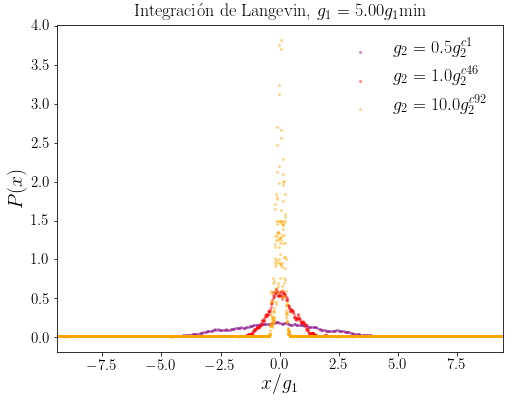

In [113]:
plt.figure(figsize=(8,6))
for j in range(len(G2)):
    g2=G2[j]
    it=2000000
    l=int(0.99*it)
    h=0.5e-3
    x=np.zeros(it)
    x[0]=np.random.uniform(0,xmax) #not so legal dude
    for i in range(1,it):
        x[i]=evol(x[i-1],h)
        if x[i]>xmax or x[i]<xmin: x[i]=x[i-1]
        if i>1500000: 
            if np.mod(i, 1000): x[i]=np.random.uniform(xmin,xmax)
    
    counts,bin_edges = np.histogram(x[-l:], 'fd', density=1)
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
    plt.scatter(bin_centres, counts,c=color[j], lw=0, s=8, alpha=0.5, label = r'$g_2 = %.1f g_2^{c%d}$'%(legend[j],idx[j]))
    plt.xlim([xmin,xmax])
    

plt.legend(loc='best', frameon=0, fontsize=18)
plt.ylabel(r'$P(x)$', fontsize=20)
plt.xlabel(r'$x/g_1$', fontsize=20)
plt.title(r'Integraci\'on de Langevin, $g_1=%.2f g_1$min'%times, fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('langevinZwanzig.png', bbox_inches='tight')
plt.show()
plt.close()